## Machine Learning

### Supervised Learning

deals with labeled data and often we know the output characterstic that we want to predic***
ex: classifcation, regression 

### Unsupervised Learning
deals with unlabelled data and often we don't know the output characterstic

ex: clusterting 

### Semi-Supervised Learning 
it is a combination of supervised and unsupervised types where we have the labelled data and we try to make it unlabelled. it's like travelling from supervised to unsupervised


### Reinforcement Learning
agent will be rewared/punished based on the event they perform over an environment

##### Train Test Validation


In [1]:
import seaborn as sns

In [2]:
titanic_data=sns.load_dataset('titanic')

In [3]:
#check missing values in datset 
titanic_data.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

C:\Users\JC\AppData\Local\Temp\ipykernel_6824\439351393.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(titanic_data['age'])


<AxesSubplot: xlabel='age', ylabel='Density'>

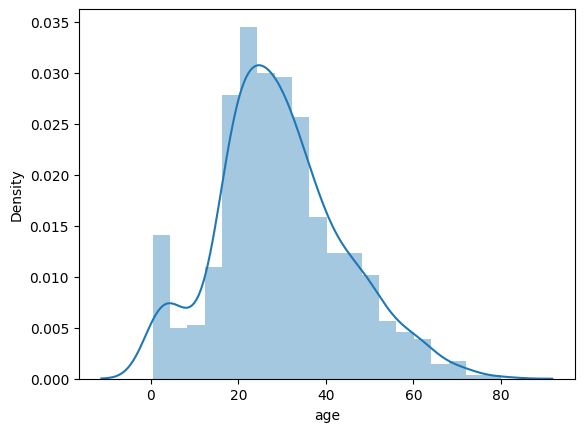

In [4]:
sns.distplot(titanic_data['age'])

In [5]:
titanic_data['age'].mean()

29.69911764705882

In [6]:
#if data is normally distributed then Impute the mean as missing value replacement 
titanic_data['age'].fillna(titanic_data['age'].mean(),inplace=True)

C:\Users\JC\AppData\Local\Temp\ipykernel_6824\1957528287.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_data['age'].fillna(titanic_data['age'].mean(),inplace=True)


<AxesSubplot: ylabel='age'>

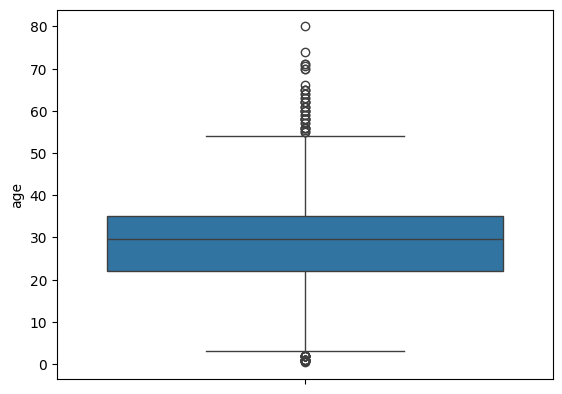

In [7]:
sns.boxplot(titanic_data['age'])

In [8]:
mean =titanic_data['age'].mean()
median=titanic_data['age'].median()

C:\Users\JC\AppData\Local\Temp\ipykernel_6824\439351393.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(titanic_data['age'])


<AxesSubplot: xlabel='age', ylabel='Density'>

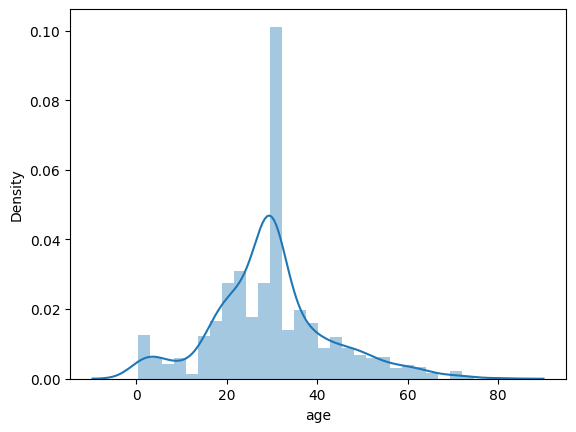

In [9]:
sns.distplot(titanic_data['age'])

In [10]:
titanic_data['age_median']=titanic_data['age'].fillna(median)

In [11]:
titanic_data['age_median'].median()

29.69911764705882

C:\Users\JC\AppData\Local\Temp\ipykernel_6824\2435429113.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(titanic_data['age_median'])


<AxesSubplot: xlabel='age_median', ylabel='Density'>

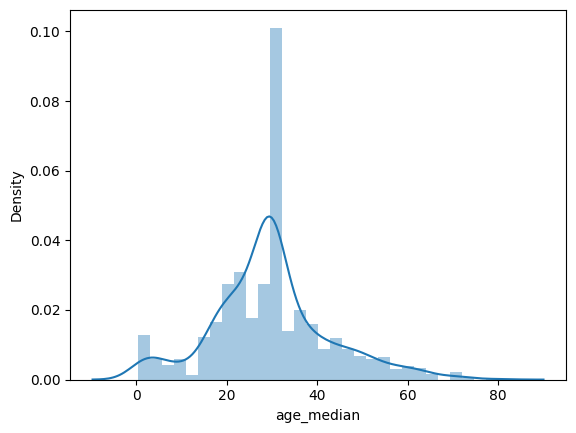

In [12]:
sns.distplot(titanic_data['age_median'])

<AxesSubplot: ylabel='age_median'>

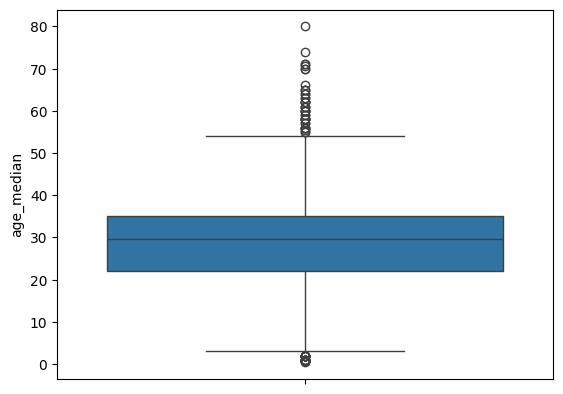

In [13]:
sns.boxplot(titanic_data['age_median'])

In [14]:
titanic_data['age']=titanic_data['age'].fillna(mean)

<AxesSubplot: ylabel='age'>

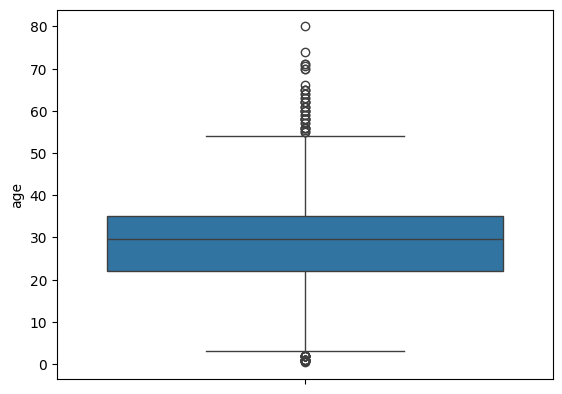

In [15]:
sns.boxplot(titanic_data['age'])

##### upsampling and downsampling to handle an imbalanced dataset

In [16]:
import numpy as np
import pandas as pd

In [17]:
np.random.seed(87)

In [18]:
#creating an imbalanced dataset of 90:10
n_samples=1000
cat_zero= 0.9
n_samples_zero=int(n_samples*cat_zero)

In [19]:
n_samples_one=n_samples-n_samples_zero

In [20]:
n_samples_one

100

In [21]:
class_zero=pd.DataFrame({
     'feature_1':np.random.normal(loc=0,scale=1,size=n_samples_zero),
    'feature_2':np.random.normal(loc=0,scale=1,size=n_samples_zero),
     'target':[0]*n_samples_zero
                        })

In [22]:
class_zero

,feature_1,feature_2,target
0,0.372376,-0.964726,0
1,0.127916,2.349414,0
2,0.527212,-0.557496,0
3,-0.370773,-0.220489,0
4,1.750443,1.906208,0
...,...,...,...
895,-0.225038,-0.117957,0
896,0.386296,0.523159,0
897,-0.746715,1.050940,0
898,0.793028,1.787175,0


In [23]:
class_one = pd.DataFrame({
    'feature_1':np.random.normal(loc=0,scale=1,size=n_samples_one),
    'feature_2':np.random.normal(loc=0,scale=1,size=n_samples_one),
    'target':[1]*n_samples_one
})

In [24]:
class_one

,feature_1,feature_2,target
0,-0.943060,-1.096885,1
1,-2.300445,-1.291719,1
2,0.863079,-0.124060,1
3,-2.092222,1.618694,1
4,-1.461564,-0.558781,1
...,...,...,...
95,2.312554,0.100719,1
96,0.512916,0.120367,1
97,-0.664075,1.260299,1
98,0.266100,2.052381,1


In [25]:
df=pd.concat([class_zero,class_one]).reset_index()

In [26]:
df['target'].value_counts()

target
0    900
1    100
Name: count, dtype: int64

##### upsampling to reduce the imbalance 

In [27]:
df_minority=df[df['target']==1]

In [28]:
df_majority=df[df['target']==0]

In [76]:
#perform upsampling on the minority to increase more samples
%pip install scikit-learn

   ---------------------------------------- 11.1/11.1 MB 9.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [29]:
from sklearn.utils import resample

In [30]:
df_minority_upsampling=resample(df_minority,replace=True,n_samples=len(df_majority),random_state=42)

In [31]:
df_minority_upsampling.drop(columns='index',axis=1,inplace=True)

In [32]:
df_minority_upsampling.shape

(900, 3)

In [33]:
df=pd.concat([df_majority,df_minority_upsampling])

In [34]:
df.drop(columns='index',axis=1,inplace=True)

In [35]:
df

,feature_1,feature_2,target
0,0.372376,-0.964726,0
1,0.127916,2.349414,0
2,0.527212,-0.557496,0
3,-0.370773,-0.220489,0
4,1.750443,1.906208,0
...,...,...,...
952,0.972233,-1.685674,1
965,1.922856,-1.581127,1
976,-0.258466,-0.471212,1
942,-0.042525,1.464269,1


#### Downsampling

In [36]:
resample(df_majority,replace=False,n_samples=len(df_minority),random_state=87)

,index,feature_1,feature_2,target
611,611,1.365725,0.534998,0
668,668,-1.826524,-1.321077,0
768,768,1.122965,-0.415306,0
711,711,0.860501,0.411208,0
417,417,0.195096,0.224495,0
...,...,...,...,...
194,194,-0.838652,-0.748477,0
305,305,-0.102002,-0.852003,0
34,34,0.171198,2.258425,0
361,361,-0.946048,-0.311114,0


### SMOTE (sythetic minority oversampling techniquie)

In [37]:
from sklearn.datasets import make_classification

In [38]:
X,y=make_classification(n_features=2,n_samples=1000,n_redundant=0,weights=[0.90],random_state=42)

In [39]:
X  #independent variables 


array([[-0.05861915, -0.35109008],
       [ 1.24668618,  1.15359685],
       [ 0.96277683,  0.85939747],
       ...,
       [-0.10126746, -1.59017563],
       [ 0.64376105, -0.78053855],
       [ 0.69852984, -1.27940455]])

In [40]:
sm_X=pd.DataFrame( X, columns=['Feature_1','Feature_2'])
sm_y=pd.DataFrame(y,columns=['Target'])

In [41]:
sm_data=pd.concat([sm_X,sm_y],axis=1)

In [42]:
sm_data['Target'].value_counts()

Target
0    895
1    105
Name: count, dtype: int64

In [43]:
import matplotlib.pyplot as plt 

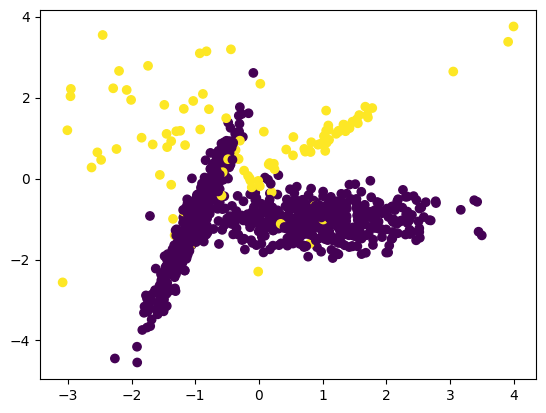

In [44]:
plt.scatter(x=sm_data['Feature_1'],y=sm_data['Feature_2'],c=sm_data['Target'])

In [45]:
from imblearn.over_sampling import SMOTE

In [46]:
##transform dataset
oversample=SMOTE()

X,Y=oversample.fit_resample(sm_data[['Feature_1','Feature_2']],sm_data['Target'])

In [47]:
X.shape

(1790, 2)

In [48]:
Y

0       0
1       1
2       1
3       1
4       0
       ..
1785    1
1786    1
1787    1
1788    1
1789    1
Name: Target, Length: 1790, dtype: int32

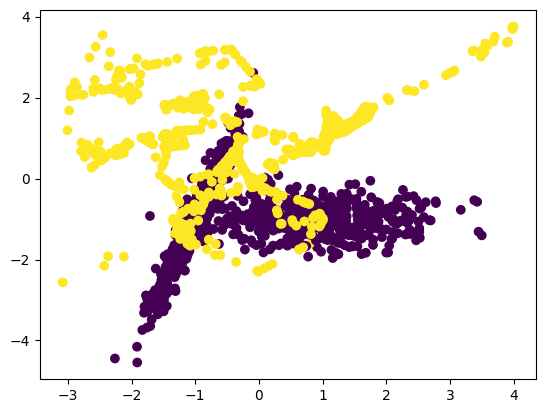

In [49]:
plt.scatter(x=X['Feature_1'],y=X['Feature_2'],c=Y)

#### Data Interpolation
* Linear Interpolation
* cubic Interpolation
* polynomial Interpolation

Abve techniques are used to add data points that are in sync with the currentdata



* Feature scaling 
   - scaling the data in a specific range of a feature 
   - eg: Normalization (min,max scalar) ,z-score (x-x_bar/std)(standadization mu=0,sigma=1) ,unit vector
   because of the above techniques the calculation will be little faster as the numbers are scaled down overall improves the performance

#### Feature Extraction 
- choosing most important features from the data set 
* filter method
* embedded method 
* PCA - principal component analysis


In [50]:
###Feature Scaling 

In [51]:
###Standadization

In [58]:
import seaborn as sns
import numpy as np 

In [54]:
df=sns.load_dataset('tips')

In [55]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [60]:
total_bill=df['total_bill']

mean=np.mean(total_bill)
std=np.std(total_bill)

In [62]:
z_scores_bill=[]
for i in total_bill:
    z_scores_bill.append((i-mean)/std)
    

In [63]:
z_scores_bill

[-0.3147113050904943,
 -1.0632353132988692,
 0.13777989987156145,
 0.43831510316725475,
 0.540744704290506,
 0.6195367051545455,
 -1.2399545152367863,
 0.7985071071171495,
 -0.5342033074974614,
 -0.5634689078183903,
 -1.0711145133852733,
 1.7417599174609364,
 -0.49143050702841123,
 -0.15262490331304146,
 -0.557840907756673,
 0.2019391005751361,
 -1.0643609133112126,
 -0.3935033059545337,
 -0.31696250511518104,
 0.09725829942719795,
 -0.2100305039425557,
 0.05673669898283484,
 -0.45203450659639155,
 2.2100095225958003,
 0.003833498402694168,
 -0.2224121040783337,
 -0.7221785095588127,
 -0.7987193103981653,
 0.21544630072325727,
 -0.015301701807144186,
 -1.1521577142739994,
 -0.16162970341178864,
 -0.5319521074727743,
 0.10176069947657193,
 -0.22578890411536368,
 0.4810879036363046,
 -0.3912521059298469,
 -0.32146490516455467,
 -0.12335930299211233,
 1.2926455125359115,
 -0.4216433062631192,
 -0.2618081045103532,
 -0.6580193088552376,
 -1.137524914113535,
 1.1947183114620337,
 -0.1683833

C:\Users\JC\AppData\Local\Temp\ipykernel_6824\1285936593.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['total_bill'])


<AxesSubplot: xlabel='total_bill', ylabel='Density'>

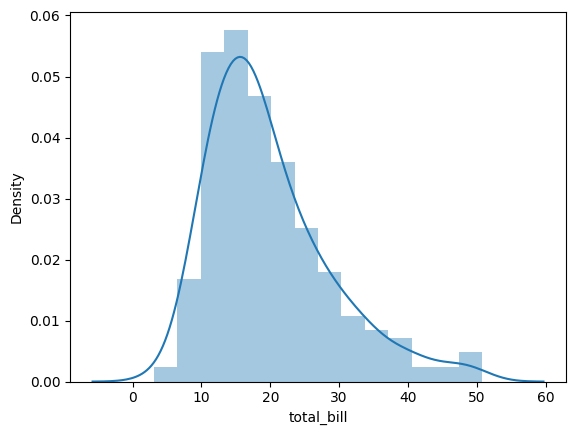

In [64]:
sns.distplot(df['total_bill'])

C:\Users\JC\AppData\Local\Temp\ipykernel_6824\1118354462.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(z_scores_bill)


<AxesSubplot: ylabel='Density'>

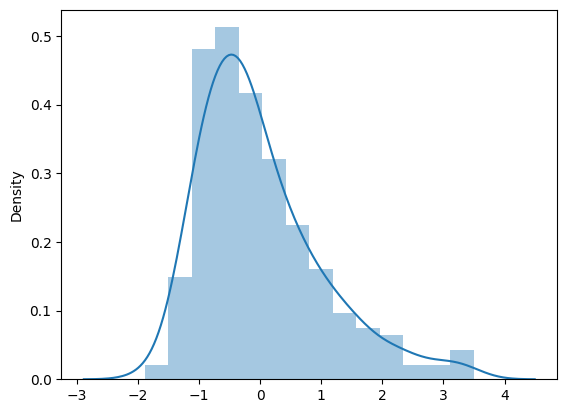

In [65]:
sns.distplot(z_scores_bill)

In [66]:
from sklearn.preprocessing import StandardScaler

In [69]:
scaler=StandardScaler()

scaler.fit(df[['total_bill']])

StandardScaler()

C:\Users\JC\AppData\Local\Temp\ipykernel_6824\485456741.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(scaler.transform(df[['total_bill']]))


<AxesSubplot: ylabel='Density'>

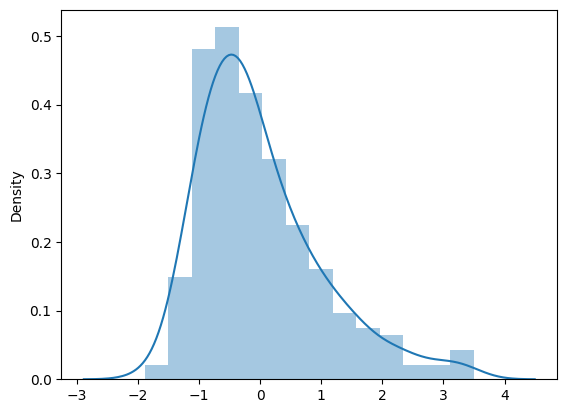

In [71]:
sns.distplot(scaler.transform(df[['total_bill']]))

In [73]:
#### Min max normalization

##it will scale the data between 0,1   x_scaled = x-xmin/xmax-xmin
from sklearn.preprocessing import MinMaxScaler

##### PCA - principle component analysis

- it is a technique that is used to get the maximum data points or features in the lower dimension based on the best fit line or curve which captures majority of the information by reducing data loss

### Data Encoding 
- Data encoding is a technique which converts the categorical values into numerical entities which is understandable to machine

#### Types
 * One Hot Encoding  (Nominal)
 * Label Encoding   (Ordinal) 
 * Target gudided Ordinal Encoding

##### One Hot Encoding

it is a technique used to transform the categorical variables that have no interesic ordering into numerical values that can be used in machine learning models. one common method for nominal encoding is one-hot encoding which creates a binary vector for each category variable

In [75]:
from  sklearn.preprocessing import OneHotEncoder

from sklearn.preprocessing import LabelEncoder,OrdinalEncoder

In [76]:
###Above encoders are used to fit and transform the data 


### EDA - exploratory data analysis

1. find the info of data 
2. describe the descriptive stats for the data 
3. find missing values 
4. impute the NAN values 
5. find if any duplicates are present or not if present drop the duplicates 
6. if numericals are present find the co-relation (use heatmap with annote=True) for understanding the corr
7. plot the bar plot for categorical varibles 


In [83]:
winedf=pd.read_csv('wine-quality.csv')

In [84]:
winedf

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [85]:
winedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [88]:
winedf.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


<AxesSubplot: ylabel='Count'>

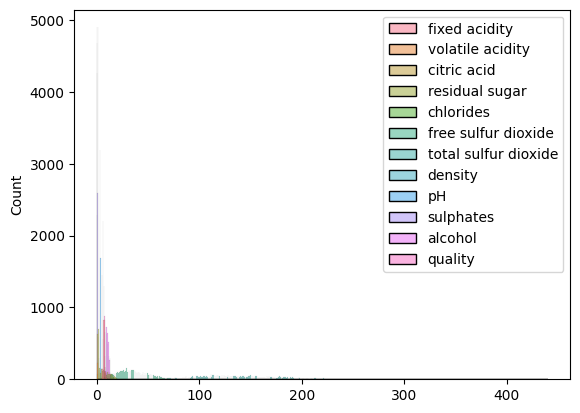

In [91]:
sns.histplot(winedf)

<AxesSubplot: >

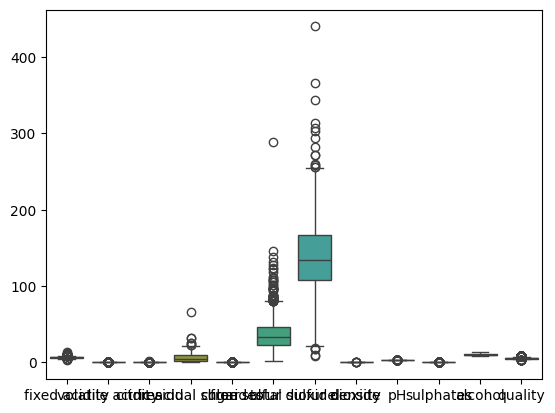

In [108]:
sns.boxplot(winedf)

In [100]:
np.linspace(0,len(winedf['pH']))

array([   0.        ,   99.95918367,  199.91836735,  299.87755102,
        399.83673469,  499.79591837,  599.75510204,  699.71428571,
        799.67346939,  899.63265306,  999.59183673, 1099.55102041,
       1199.51020408, 1299.46938776, 1399.42857143, 1499.3877551 ,
       1599.34693878, 1699.30612245, 1799.26530612, 1899.2244898 ,
       1999.18367347, 2099.14285714, 2199.10204082, 2299.06122449,
       2399.02040816, 2498.97959184, 2598.93877551, 2698.89795918,
       2798.85714286, 2898.81632653, 2998.7755102 , 3098.73469388,
       3198.69387755, 3298.65306122, 3398.6122449 , 3498.57142857,
       3598.53061224, 3698.48979592, 3798.44897959, 3898.40816327,
       3998.36734694, 4098.32653061, 4198.28571429, 4298.24489796,
       4398.20408163, 4498.16326531, 4598.12244898, 4698.08163265,
       4798.04081633, 4898.        ])